https://www.youtube.com/watch?v=AjsB6lM2-zw

- duck db는 in-process OLAP DBMS이다.
분석 처리를 어플리케이션과 동일한 프로세스나 메모리 공간에서 수행하는 데이터베이스 관리 시스템의 한 유형

OLTP는 대규모 용량의 데이터를 핸들링하기 위함이고
OLAP은 데이터 분석을 위함이다.



OLTP데이터 베이스는  row 기반 DB로


많은 수의 짧은 트랜잭션(Transaction)이 발생합니다.
각 트랜잭션은 비교적 적은 수의 레코드를 조작합니다.
주로 색인(index)을 사용하여 레코드를 조회하고 갱신합니다.
이러한 특성으로 인해 OLTP 데이터베이스는 행 지향 구조를 사용하여 빠르고 효율적인 단일 레코드에 대한 조회 및 갱신 작업을 지원합니다. 결과적으로 OLTP 데이터베이스는 행 지향 방식을 채택하여 이러한 유형의 작업을 최적화하고 처리 성능을 향상시킵니다.

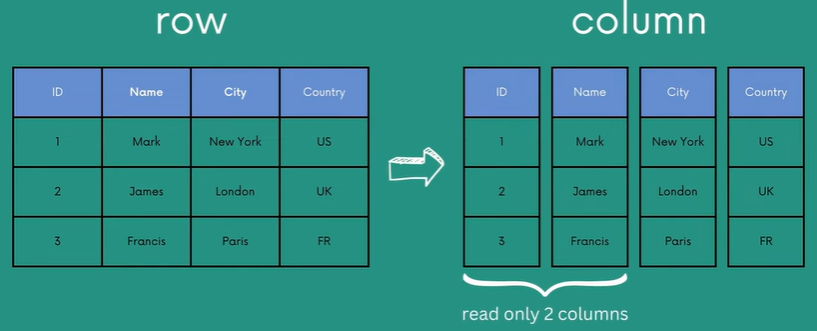

In [ ]:
OLAP은 열기반의 데이터베이스이다.
열 지향 데이터베이스는 각 열(column)을 독립적인 단위로 저장하고, 각 열은 여러 행(row)의 값을 포함합니다. 이러한 구조는 데이터 분석 작업에 유용하며, 대량의 데이터를 효율적으로 처리할 수 있는 장점이 있습니다.

덕db가 왜 빠른지는 이런 열기반의 과정에서 있다.
vectoruzed processing

파이썬 R 자바 등등 API를 가지고 있기에 접근성도 좋다.



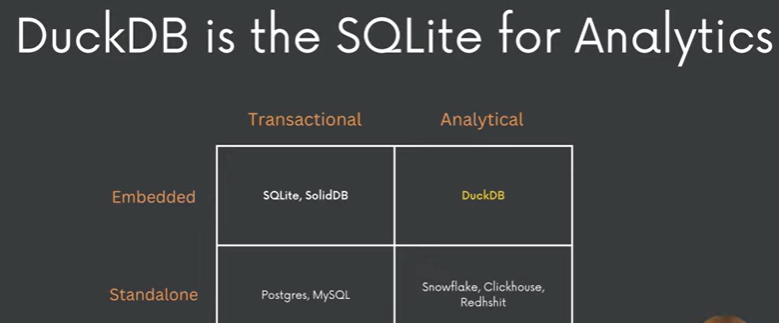


# duck db의 한계
- 싱글머신에서 돌아간다.
- 싱글플레이어 경험이다.
- 데이터를 공유하는 등에서 힘들지 않을까?
- not for transactions- Read-only for concurrent connection

# 실습

In [1]:
python -m venv venv
source venv/bin/activate
가상환경을 만들고
실행한다.

SyntaxError: invalid syntax (2541634460.py, line 1)

In [ ]:
requirements.txt #파일을 작성
pip install -r requirements.txt # 설치

In [ ]:
notebook.py에 적은 코드를 실행하여 connect 해준다.
그러면 mydb.db가 생긴다.

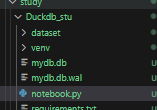

In [ ]:
예시에서는 여러개의 csv 파일을 병합하고 처리하는 과정을 거친다.
-> 판다스로 먼저 데이터들을 병합해준다. pd.concat을 이용하여
아마 시간 비교를 하기 위함으로 보여진다.

In [1]:
import pandas as pd
import glob
import time
import duckdb

In [4]:
# 판다스 코드
cur_time = time.time()
df = pd.concat([pd.read_csv(f) for f in glob.glob('dataset/*.csv')])
print(f"time : {(time.time() - cur_time)}")
print(df.head(10))

time : 0.27735400199890137
   Order ID                     Product  Quantity Ordered     Price  \
0    176558        USB-C Charging Cable                 2     11.95   
1    176559  Bose SoundSport Headphones                 1     99.99   
2    176560                Google Phone                 1       600   
3    176560            Wired Headphones                 1     11.99   
4    176561            Wired Headphones                 1     11.99   
5    176562        USB-C Charging Cable                 1     11.95   
6    176563  Bose SoundSport Headphones                 1     99.99   
7    176564        USB-C Charging Cable                 1     11.95   
8    176565          Macbook Pro Laptop                 1  1,700.00   
9    176566            Wired Headphones                 1     11.99   

   Order Date      Time                        Purchase Address  \
0  19-04-2019   8:46 AM            917 1st St, Dallas, TX 75001   
1  07-04-2019  10:30 PM       682 Chestnut St, Boston, MA

In [7]:
conn = duckdb.connect()

In [8]:
cur_time = time.time()
df = conn.execute("""
             SELECT *
             FROM 'dataset/*.csv'
             LIMIT 10
""").df()

print(f"time: {(time.time() - cur_time)}")
print(df)

time: 0.05996131896972656
   Order ID                     Product  Quantity Ordered     Price  \
0    176558        USB-C Charging Cable                 2     11.95   
1    176559  Bose SoundSport Headphones                 1     99.99   
2    176560                Google Phone                 1       600   
3    176560            Wired Headphones                 1     11.99   
4    176561            Wired Headphones                 1     11.99   
5    176562        USB-C Charging Cable                 1     11.95   
6    176563  Bose SoundSport Headphones                 1     99.99   
7    176564        USB-C Charging Cable                 1     11.95   
8    176565          Macbook Pro Laptop                 1  1,700.00   
9    176566            Wired Headphones                 1     11.99   

  Order Date      Time                        Purchase Address  \
0 2019-04-19   8:46 AM            917 1st St, Dallas, TX 75001   
1 2019-04-07  10:30 PM       682 Chestnut St, Boston, MA 022

In [11]:
# 자동으로 컬럼의 헤드를 지정하는 것

cur_time = time.time()
df = conn.execute("""
             SELECT *
             FROM read_csv_auto('dataset/*.csv',header =True)
             LIMIT 10
""").df()
print(df)

   Order ID                     Product  Quantity Ordered     Price  \
0    176558        USB-C Charging Cable                 2     11.95   
1    176559  Bose SoundSport Headphones                 1     99.99   
2    176560                Google Phone                 1       600   
3    176560            Wired Headphones                 1     11.99   
4    176561            Wired Headphones                 1     11.99   
5    176562        USB-C Charging Cable                 1     11.95   
6    176563  Bose SoundSport Headphones                 1     99.99   
7    176564        USB-C Charging Cable                 1     11.95   
8    176565          Macbook Pro Laptop                 1  1,700.00   
9    176566            Wired Headphones                 1     11.99   

  Order Date      Time                        Purchase Address  \
0 2019-04-19   8:46 AM            917 1st St, Dallas, TX 75001   
1 2019-04-07  10:30 PM       682 Chestnut St, Boston, MA 02215   
2 2019-04-12   2:38 

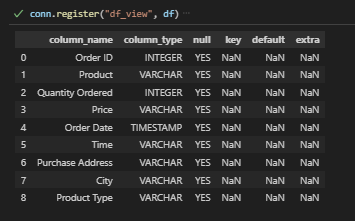

In [ ]:
# %% 
conn.register("df_view", df)
conn.execute("DESCRIBE df_view").df()
# 데이터 모양 확인

# 결측치 여부 확인
df.isnull().sum()

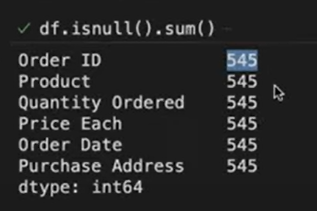

## 특정 값을 찾을때

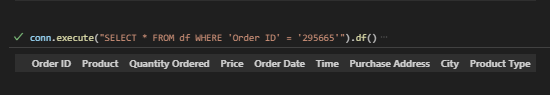

conn했을때 값이 안나온다. 이는 Order ID가 제대로 인식이 되지 않기때문이다.
따라서 해당 쿼리를 묶을때 """ 이렇게 묶어줘야한다."""

또는 컬럼명을 소문자와 언더바(_)를 이용하여 바꿔줘야한다.

In [ ]:
# %% 
conn.execute("""SELECT * FROM df WHERE "Order ID" = '176558'""").df()

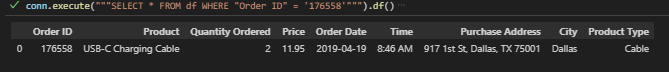

## 컬럼명 변경하기

In [ ]:
# %% 
conn.execute("""
CREATE OR REPLACE TABLE sales AS
            SELECT
             "Order ID* ::INTEGER AS order_id,
             Product AS product,
             "Quantity Ordered"::INTEGER AS quantity,
             "Price Each"::DECIMAL AS price_each,
             strptime("Order Date", '%m/%d/%Y %H:%M')::DATE as order_date,
             "Purchase Address" AS purchase_address
            
            FROM df
            WHERE 
             TRY_CAST("Order ID" AS INTEGER) NOTNULL
""")

이렇게하면 데이터 타입과 등등도 함께 바꿀 수 있다.
